# Desafío - Naive Bayes

* Integrantes Power Rangers:
    - César Flores
    - Hugo Contreras
    - Esteban Ramírez
    - Rodrigo Campos

## Ejercicio 1: Preparar el ambiente de trabajo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import glob
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
import matplotlib
matplotlib.font_manager._rebuild()

In [2]:
file_list = glob.glob(os.getcwd() + '/dump/*.csv')
append_csv = []
for f in file_list:
   append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))
df_lyrics = pd.concat(append_csv)
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

## Ejercicio 2: Descripción de los datos

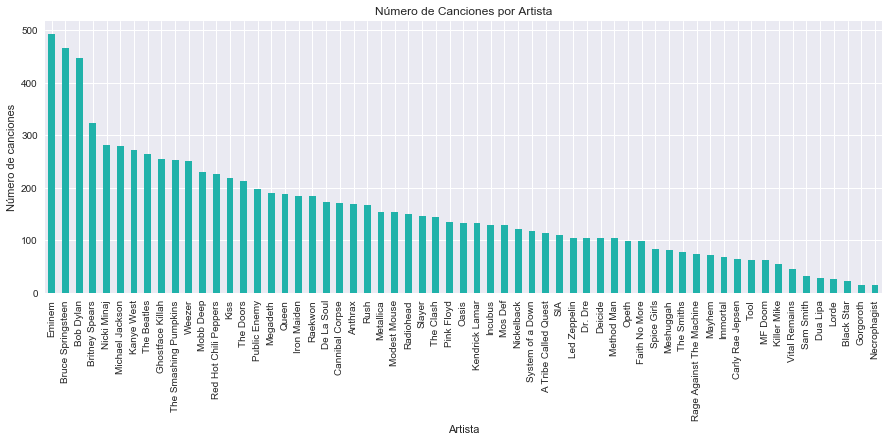

In [19]:
plt.figure(figsize = (15,5))
plt.title('Número de Canciones por Artista')
plt.xlabel('Artista')
plt.ylabel('Número de canciones')
df_lyrics['Artist'].value_counts().plot(kind = 'bar', color = 'lightseagreen')
plt.show()

* Como se puede observar, el artista con mayor número de canciones es Eminem, seguido de Bruce Springsteen y Bob Dylan.

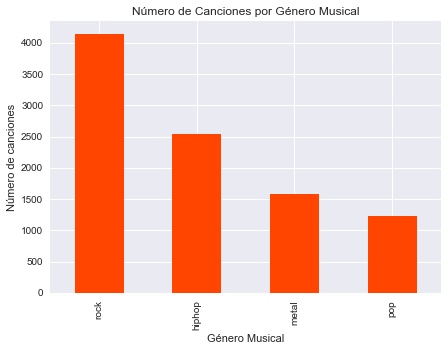

In [20]:
plt.figure(figsize = (7,5))
df_lyrics['Genre'].value_counts().plot(kind = 'bar', color = 'orangered')
plt.title('Número de Canciones por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Número de canciones')
plt.show()

* El género musical con mayor presencia en nuestras bases de datos son el rock con más de 4000 cacniones y el hip-hop con alrededor de 2500 canciones.

## Ejercicio 3: Matriz de ocurrencias

__Feature_extraction.text --> CountVectorizer__

* El objetivo de la clase CountVectorizer es tomar una colección de textos y convertirlos a una matriz que cuenta las ocurrencias de cada palabra para su posterior análisis y/o porcesamiento.

__Función para extraer las 100 palabras más repetidas de una colección de textos__

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
def words(df,target = 'Lyrics', genre = None, n=100):
    if genre != None:
        df_filtered = df[df['Genre'] == genre][target]
    else:
        df_filtered = df[target]
    count_vectorizer=CountVectorizer(stop_words='english',max_features=1000)
    count_vectorizer_fit = count_vectorizer.fit_transform(df_filtered)
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    dic = {'Palabras':words,'Frecuencia':words_freq}
    df_return = pd.DataFrame(dic)
    return df_return.sort_values(by = 'Frecuencia', ascending= False).iloc[0:n, :]

__100 palabras más repetidas en todo el dataframe__

In [8]:
all_database = words(df_lyrics,'Lyrics')

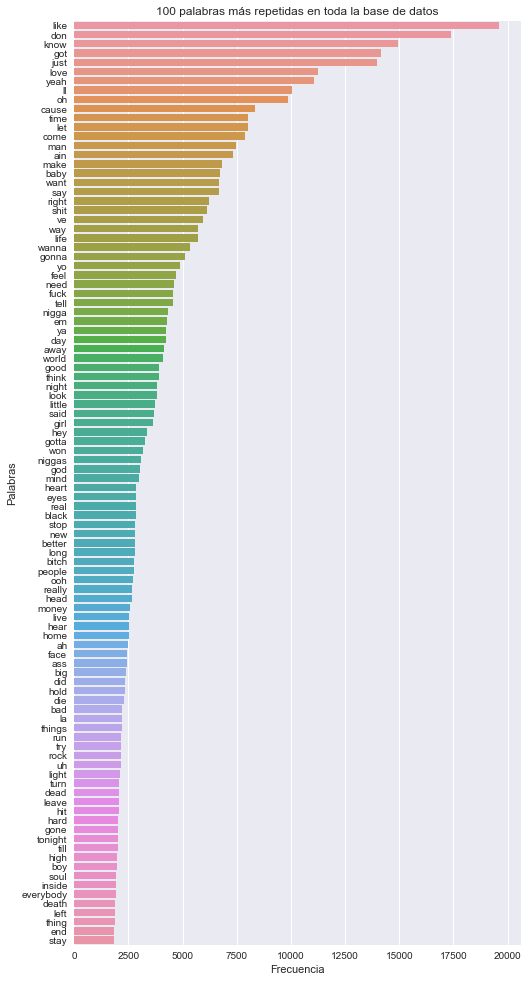

In [17]:
plt.figure(figsize = (8,17))
sns.barplot(all_database['Frecuencia'],all_database['Palabras'])
plt.title('100 palabras más repetidas en toda la base de datos')
plt.show()

__Palabras más repetidas por género musical__

In [41]:
hip_hop = words(df_lyrics,'Lyrics', 'hiphop')
hip_hop.name = 'hip_hop'

In [42]:
rock = words(df_lyrics,'Lyrics', 'rock')
rock.name = 'rock'

In [43]:
metal = words(df_lyrics,'Lyrics', 'metal')
metal.name = 'metal'

In [44]:
pop = words(df_lyrics,'Lyrics', 'pop')
pop.name = 'pop'

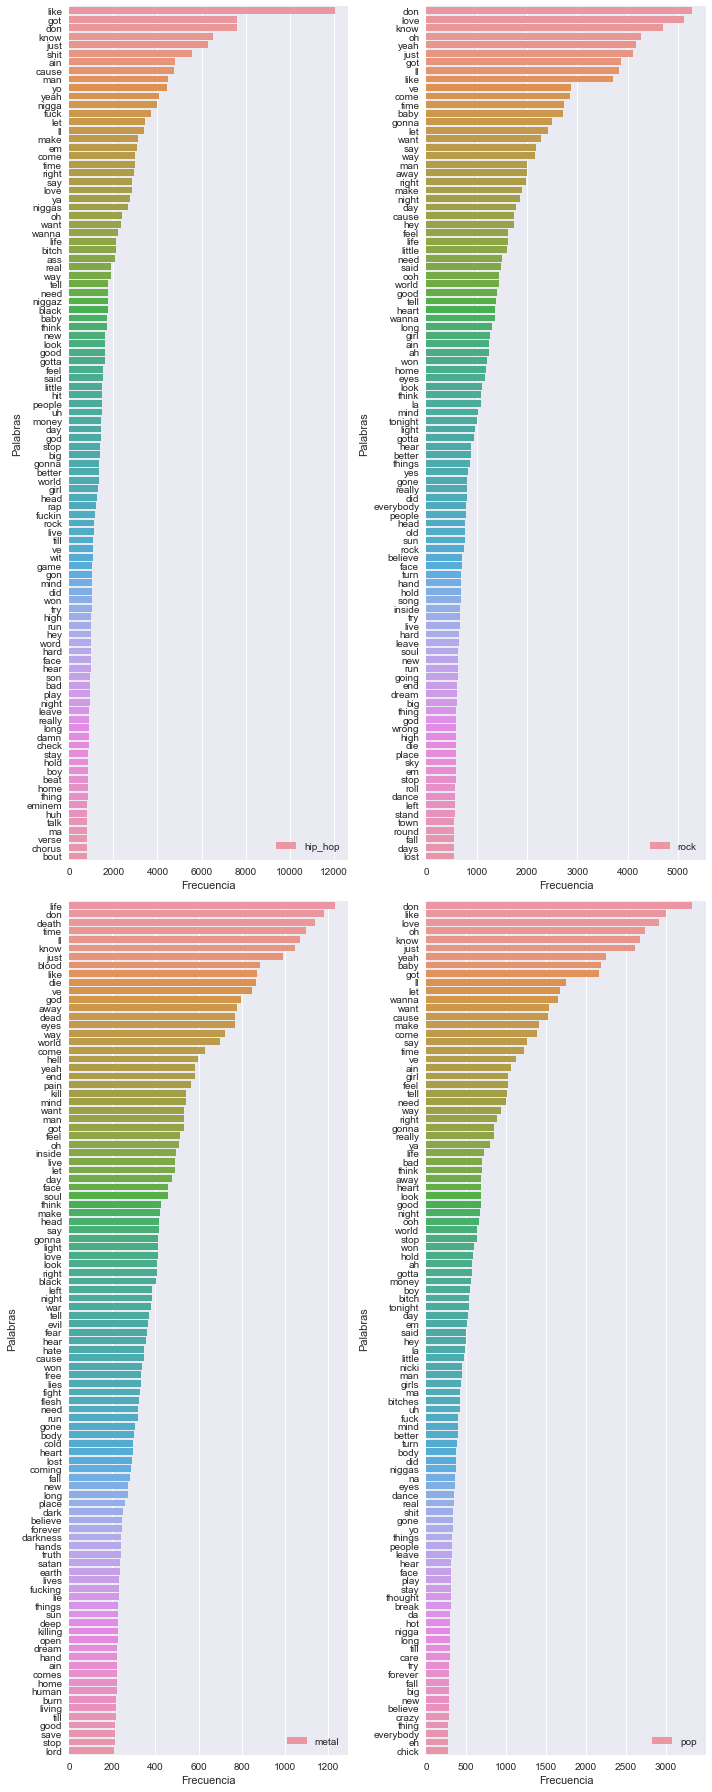

In [45]:
contador = 1
plt.figure(figsize = (10,25))
for i in [hip_hop,rock,metal,pop]:
    plt.subplot(2,2,contador)
    sns.barplot(i['Frecuencia'],i['Palabras'],label = i.name)
    plt.tight_layout()
    plt.legend()
    contador += 1  

__Comentario para cada uno de los géneros musicales analizados__

__rock:__ Las palabras más asociadas a ese género musical se relacionan con la noche, el rock comoe stilo de vida, etc.

__hip-hop:__ Las palabras más utilizadas son de carácter más grosero o soez, más duro, y relacionados con la vida cotidiana y las calles,y en este caso, de los lujos y otras vanalidades.

__pop:__ Las palbras más utilizadas por este género se relacionan más con el amor, las fiestas y el dinero.

__metal:__ Las palabras más utilizadas a este estilo musical  suelen hablar de aspectos más oscuros de la humanidad, temas como la muerte, el infierno o incluso la misma vida.

## Ejercicio 4: Entrenamiento del Modelo

__Importación de PipeLine__

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report

__Generar muestras de entrenamiento y validación__

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],df_lyrics['Genre'], random_state = 16251, test_size = 0.4)

__Generar PipeLine de trabajo__

In [51]:
modelo_pipline = Pipeline([('vect',CountVectorizer(stop_words = 'english')),('model',MultinomialNB(alpha = 0.1))])

__Entrenamiento del modelo y Predicción__

In [52]:
modelo_pipline.fit(x_train, y_train)
y_hat = modelo_pipline.predict(x_test)

__Métricas de Desempeño__

In [53]:
confusion_matrix(y_test,y_hat)

array([[ 941,    8,   29,   34],
       [  18,  473,    8,  132],
       [  66,    7,  241,  169],
       [ 103,  123,  137, 1307]], dtype=int64)

In [54]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

      hiphop       0.83      0.93      0.88      1012
       metal       0.77      0.75      0.76       631
         pop       0.58      0.50      0.54       483
        rock       0.80      0.78      0.79      1670

    accuracy                           0.78      3796
   macro avg       0.75      0.74      0.74      3796
weighted avg       0.78      0.78      0.78      3796



* Como se puede observar la capacidad del modelo para clasificar la letra de una canción em los géneros hiphop, rock es bastante buena, sin embargo, para predecir si es metal tiene un desempeño más bajo, finalmente, obtiene un desempeño muy bajo prediciendo si corresponde o no a pop. Esto se debe básicamente a la cantidad de canciones pop utilizadas en el entrenamiento, ya que al ser menor, se tienen menos atributos para la predicción.
El género con mejores predicciones es el hip hop seguido del rock, lo que se observa en el f1 score.

__Test para el modelo generado__

In [62]:
test= ['I got a place in the underworld',
          'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara',
          "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",
          'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way',
          'Sexual violence doesn\'t start and end with rape It starts in our books and behind our school gates',
          "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving",
         ]

In [63]:
prediccion_test = modelo_pipline.predict(test)
prediccion_test

array(['rock', 'metal', 'rock', 'pop', 'metal', 'rock'], dtype='<U6')

* Como se puede observar, las frases, según el modelo ajustado pertenecen a rock, metal, rock,pop,metaly rock, respectivamente.

## Ejercicio 5: Mejora del Modelo

* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datossuministrados.
* Comente sobre el desempeño general de éste.

__Estrategia__

* Dado que el modelo, predice con bajo desempeño las clases de tipo pop y metal, incuir más canciones de estos estilos, ayudará a mejorar el despeño general del modelo y la de estas clases en específico.

__Carga de nuevos datos__

In [65]:
file_list = glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')
append_csv = []
for f in file_list:
   append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))
df_lyrics = pd.concat(append_csv)
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

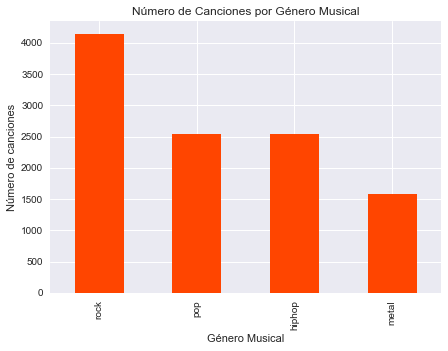

In [67]:
plt.figure(figsize = (7,5))
df_lyrics['Genre'].value_counts().plot(kind = 'bar', color = 'orangered')
plt.title('Número de Canciones por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Número de canciones')
plt.show()

* Como se puede observar, el número de canciones del género pop, aumentó significativamente, lo que favorecerá nuestro análisis.

__División de los datos en muestras de entrenamiento y validación__

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],df_lyrics['Genre'], random_state = 16251, test_size = 0.4)

In [72]:
modelo_pipline.fit(x_train, y_train)
y_hat = modelo_pipline.predict(x_test)

__Confusion Matrix__

In [73]:
confusion_matrix(y_test,y_hat)

array([[ 942,    4,   47,   33],
       [  19,  476,   16,  125],
       [ 115,   12,  642,  236],
       [  92,   94,  229, 1240]], dtype=int64)

__Resumen Métricas__

In [74]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

      hiphop       0.81      0.92      0.86      1026
       metal       0.81      0.75      0.78       636
         pop       0.69      0.64      0.66      1005
        rock       0.76      0.75      0.75      1655

    accuracy                           0.76      4322
   macro avg       0.77      0.76      0.76      4322
weighted avg       0.76      0.76      0.76      4322



* Como se puede observar, el desempeño del modelo respecto de la clase pop aumentó, aun así, el desempeño de las otras clases disminuyó levemente, sin embargo, el desempeño global del modelo aumenta.

* Como conclusiones, se observa que mientras los targets se acerquen a un estado de distribución uniforme, el modelo podrá generar mejores predicciones de clas clases.